In [2]:
import os
import numpy as np
import shutil
import random

# # Creating Train / Val / Test folders (One time use)
root_dir = 'seg_train'
classes_dir = ['/buildings', '/mountain', '/forest', '/glacier','/street','/sea']

val_ratio = 0.15
test_ratio = 0.05
for cls in classes_dir:
    os.makedirs(root_dir +'/train' + cls)
    os.makedirs(root_dir +'/val' + cls)
    os.makedirs(root_dir +'/test' + cls)


    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - val_ratio + test_ratio)), 
                                                               int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'/train' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_dir +'/val' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_dir +'/test' + cls)

Total images:  2191
Training:  1971
Validation:  110
Testing:  110
Total images:  2512
Training:  2260
Validation:  126
Testing:  126
Total images:  2271
Training:  2043
Validation:  114
Testing:  114
Total images:  2404
Training:  2163
Validation:  120
Testing:  121
Total images:  2382
Training:  2143
Validation:  119
Testing:  120
Total images:  2274
Training:  2046
Validation:  114
Testing:  114


In [68]:
"""
@author: SINDHU
"""

# Convolutional Neural Network

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout

In [69]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))


In [70]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

In [71]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))


In [72]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [73]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator
#preprocessing the training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('seg_train/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 12626 images belonging to 6 classes.


In [74]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('seg_train/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1408 images belonging to 6 classes.


In [75]:
12626//32

394

In [76]:
# Training the CNN on the Training set and evaluating it on the Test set
classifier.fit(training_set,
                         steps_per_epoch = None,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = None)

Epoch 1/25
395/395 [==============================] - 259s 656ms/step - loss: 1.0421 - accuracy: 0.5978 - val_loss: 0.8511 - val_accuracy: 0.6790
Epoch 2/25
395/395 [==============================] - 262s 664ms/step - loss: 0.7673 - accuracy: 0.7142 - val_loss: 0.6880 - val_accuracy: 0.7663
Epoch 3/25
395/395 [==============================] - 260s 658ms/step - loss: 0.6676 - accuracy: 0.7535 - val_loss: 0.7381 - val_accuracy: 0.7202
Epoch 4/25
395/395 [==============================] - 232s 588ms/step - loss: 0.5865 - accuracy: 0.7856 - val_loss: 0.6333 - val_accuracy: 0.7820
Epoch 5/25
395/395 [==============================] - 164s 414ms/step - loss: 0.5328 - accuracy: 0.8043 - val_loss: 0.6787 - val_accuracy: 0.7571
Epoch 6/25
395/395 [==============================] - 165s 418ms/step - loss: 0.4991 - accuracy: 0.8182 - val_loss: 0.5791 - val_accuracy: 0.8075
Epoch 7/25
395/395 [==============================] - 167s 423ms/step - loss: 0.4726 - accuracy: 0.8247 - val_loss: 0.5719 -

In [67]:
from keras.models import model_from_json 
# serialize model to JSON
model_json = classifier.to_json()
with open("model82t.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model82t.h5")
print("Saved model to disk")
 

Saved model to disk


In [88]:
class_labels

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [92]:
# Preprocessing the Test set
test_datagenb = ImageDataGenerator(rescale = 1./255)
test_setb = test_datagenb.flow_from_directory('seg_train/test/buildings',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 0 images belonging to 0 classes.


In [113]:
221-138
83+228

83

In [111]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

<class 'numpy.ndarray'>
(122, 183, 3)
<class 'PIL.Image.Image'>
RGB
(183, 122)
RGB
(128, 128)
(128, 128, 3)
[[8.9458592e-02 1.7400136e-05 1.7246710e-01 1.5743534e-01 5.7668209e-01
  3.9395127e-03]]


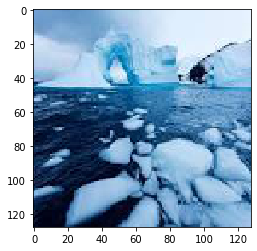

In [144]:
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from numpy import asarray
# load the image
url='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAHoAtwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAFBgMEAAIHAf/EAEMQAAIBAwMBBQUFBQYDCQAAAAECAwAEEQUSITEGE0FRYSJxgZGxBxQyocEVI0JS8DOCkqLh8SREUxYXNWJjcrLR4v/EABkBAAMBAQEAAAAAAAAAAAAAAAECAwAEBf/EACURAAICAgICAQUBAQAAAAAAAAABAhEDIRIxE0FRBCIycfBhYv/aAAwDAQACEQMRAD8AJs1eZojcaLdRnITI9KgFm4/GCtexyTPL4sqbSfCtDH6UR7sJ1FalVPhW5AoHheea3AxVpol99aFAPCtYKNUOKuQyYqkMA81btYGlbAPHicdKDMrCMEo6Zq2klVJII4wCj5x1GOa0W6jQe0XA89lT42UUkuwqjAmrcZ4odCQQCDkGrkbYqTRWLRbU4qZDmq0ZzVlB5VNlESgVtXi9K9pRjKysr2sYysrKygE9rKysrGNhWVgFZQswNZg34uagmjRxyoNRCTNeiTmrUydlWbT4X/CNtQHTI/5qJ96DXneKfAU3Jg4pgeSwC8gnNU54AoyenrR6cqylUHtnp6VukS7QGVWHqKdSZOUUL1nbKv70oJSDjbkez6+tFRdRdyR0IPIIxj51ceBUiPdqFHkOlLWtQtHE0wcqFHyp4/e6OfK5Y1aI7rXO7uWiReBy3PIH0qG31H7zIY8oXYHYxXj41Ut9Pn1G0722CxRZwjOMsW/m6cihyC8tLv7peJtnBBHIGeeCMV1qEOl2efLLmVSl0xy02WSWBhMu0r+JQeDRONyrAH8J5BoNpU5lLqerqr+WfA/nRG1Q4QbiGHB9a5JrZ6OKVpBGK8hXhyVGcZIyM1udWt1ysWZWXqAMfWhssHeIQVLPnrnk+tU7iYWkmXhkkBHARc1NQTKPK4h6DW4XH7yN0PjyDiikbiVFdejDIrn0msy94Bb2N0GbjlMA08xXcZjCw87RjJ6Cly4+I+HMsl7LeKyqkl1sjZ2YKqjLMTgAeuaWr7t7psM7W1lPBe3Q42LKFQHngvyPDwB+lS4svyQ44qjeatY2cqwzTqbhlLLAntSMAcZCjnGfHoPE0trdahcyiW71CSMSY220WFjB8gcbmz6n4CrEbyIQVAYfxA9cU6xP2JLKlottqerXI3W9rDZxggg3BMrsPHhSFH+I1bivbhcmV45M/hxGVx+dVlmVcHqDzkGt8o3IPBo8EBTsjvJGuQVmll2HoqOUA+KkH868rZgp8c+6sopJGbAgu3AyQQPMivDf443AfGuX6Xrlnp+6SSFrsk/8xdOwx7hx8eaYYftHiiwBpUOP/Tlxj/Ka6HA51k/Y9W00sgyF49RVxO8IyTg0gr9p1uW2/sxsjpifp/lFTj7TLUDL6XMMdSJwf0pPG/gPkX8mPkabST51OuMVz0/abbbsLpU3vM3/AOatQ/aEJNxTRblwoySkmcf5a3in8G88P5Md1OchqBa2YFYwXq4hceyzHCt6Z86CH7RLdcltMmUeO6VR+lZ/3gaXfRNb3OnM0bjDK8ybSPUkijHHKLuhMmSE1SY5abdWFzbLJbsrIPZwB09KHdstOtb7TDNCALu3G6M5HtD+Jfl+dc/k1iz01HGjG5trYkkxpfRMDn5sfjk1W/7UXqEYv7kDyMcfH+WmhgfLlFk8n1CcHCSsJ6JrBgu1FwHkhbIXY23bnPz+dO8M0Eqq6tv6EEE5rllvdQPIWKTFjzncPyAHFHbbW7qNP3d7KigdGCk//H610ZMantdnHhyyx6atDo7XSzMYWTujzhwSc1I0jsv7xV+GaSjr187kC9kJHoo/LFeHWdQP/MSN/f21PwP5LL6r/ljc4LdG2+4V7Za9HHqx0j9nzgLEJe/aRNrA8cAnPgRwPCk+K+1K4lC99KATjPfEfrRmzj1CNSqXchJOcsofB9CwJH0qeTFrsthztvUWJ32u9or+9nj0iFGS1ij7+eOMZDe1gFm8QCPIDJ8etIelaNfalqSW0AjRxhizTKoUcc5z15zjrXbLs39wDHcTxTDp7cSg9P8A20DuOzmmTXa3M2mWvffyhyqH1KAY8euKl4mdcc6S6LdnOlrpFtZXCvfSxqot54VIRGX8JIJJODjk/IU3QXIYKSB6ik+dbyG2aCzSGJGY8B+FyckD2f1qzb32pxRKk1vC2Bywlxn8qv41xOTySU22NpbaxCsu08kHjFatKnIZj6YI4pdjvZ3xvtB8Zv0K1YTUXXrZDAH/AFM/pQ8bCsv9TCTkkYDEj1JNZQx9XKgYsyfdJ/pWVuDM8q/kxAi1yNYWtrLTrGBnGd0UcvX0J8agkSe5ljl1CWTH/WdQvHrwCaFT6srxlXlVQR0WQkH3hfH31SOo2MKuILRZCfFk2/mD+lLyR0cGxpW30SJGY6jezMOogAQfmxoJdR6cshaxmmQE8/epznHwGTQptYuyxMaRBWGMCJePj1rz9r3YdWDJGy9Cq9PgTihzQfGwhuEcjPAqzce0AGAYe8nPxqWXV2H9lYW0AJ5YSvk+85oKs5kb25iD6tVv73AVB71lPkCSR/XvoqQrh/gThuLwpHMkUIKPwyzKWB6j2c9PXFEbjWNV1Jtk9vbuzeKRRqT7zil9p4GVSZpXI6If96jN3PM5Jj7znoV4FOpIm8YdK3FtkTQlFPihz9KilkDRko7+zwcjGPnzQp7m7yuzfHgdAKLaHpuuXk8UsFmtxGBwLhh3ePUZpuYni0ZZOxdVjR5GY4CBdx+FElukhfZNF3bY5BUgj8qbNK7P3SvHctHb2U6k7xp8ftuP5dzHaPkfhVHtBqPaHT3HfCaGy3BEkuFgkLHnyJ+greSxfEDnlRjtjLAkfxH/AGrYugAbOB5edCI7nljGd2Tnhs8n6VJFK8kqRxkb2ONv+5pxKC8V6sJVismOcd3GWz+RowurQRW+W3lcZbbC7YH90UAht4WLRzcSghTwGHu8qvvb2z4Z9rbenslc/I0stjw0WR2h02aVQJVVsdW3AqfLDAVZS4t42I2shlyR1548CM/WqUUKEp92Tbt83GP8x+lWEjnM2xMrxwVYMG9MmkpD2yd7mEttPJI6MCOPf0rcyjjdA5APGNp/XNRpHNjLtg9CMck/St/urI247o8D8RTg+tHRtnjXEHCsOc8b1I/StLq47iPJ24A3AAsT8q9kLRPsZztb8J3Y/oVQ1S9XTZu7ue+DMAwKxlkx6MBg/nWRix95kMIdIwfDJY//AEayg0+oxSPvVt24e024qR8/D+sVlHRjnckltESMI5PgjZA/I/WoRKx/skwOhwoP54qX7iMbmlUZOMc8fpW+2wjHM5k/8qp9T/rXLv2d2vRcsLvR1j/47R5LiQDHs3bIPf8A1mqc4Dys9vCLeP8AhjBL4HvY5NeRSTXMndWUbsemEQZH9etXJezmsw24uZdPlVD4grn3nxo/oXrsH+z03+18vpWimPnqfeeK0B3D2I2OfI1Mgd2BBZT6c/U1rGo3jzt3KBgc5EYwPiSK9e7fpG2W44wD+VbRwvNg7TIQeHY/T+jTZpq9qb+3SG17uRVwqy3SIzAHyLDp76ZJk20gFr+lyaRLDC9yJ2eMSPwVMRPgRk/OpOy/aC80O6kNgqSmXG+PGScdOnvrqug9jtNsIxPfpHf6i2DJcSIMA+Sr0HyzRt4I4xiKNUHkoxWvYrejnc32mah3bRrYiOUjGWflT7sUu3Wu6hrE1v8AtW4NxHHKD3exR4jPAHiKY+12laOmtQXU7lJbiYCSESEd94Z46eHIxTA3ZLQbiAIbBISRx93lfI+OeaZCPZp2lVZOzwFtpiRqqg96yY7tfQD2s/Ck23vdKFu0Vxayyz7fZuY5GCn0ZTjFFNZ7HiC/jg0adpXlUb0uMOIV88n/AHpn07sDoqKvftc3LY9rMm0H4Lijy4oTjbOfC5tQ4YxIhx7A7vj4Hr+dXLbVrOJiJXUKeA8XslfeP9a6pY9nNIsMi20+BM9SU3k/E5og9laSoElt4XUDADRjAoeYbxHJYtaUkiKdnVeFViWz78/PpVyA3OsIW3RYU4z7K5/wjNPd32R0O6DbtPgRz/HGNjD3EUIl7CRIyyWt3IpTpvUHjyGMYorIgPG0S6T2cSPbJ+1Jw4HCxbQvPvBzQ7tJptzpLffYr0vBnLmdEynrlVGaG63f612cvI1kULHIQFkYbkb0BHjx6Giiyaprmns8UaRb/wCzdnIyPPG361q3dmtVVA4w3WoRL3ZhuYG4aSHEhUY67cgmjukWFpNp7WiaiZVVh7Pd7CmPDB6UsP2T12CUPFDGWIwZYpMED55+QqQXOmadeG11C3lF5ja84lJcn35yPdTPfsVa9Bm57JwWcrTWNhBKWY5Lv5+h6VlD5ri3vG2W/aC5tUxkRyxk8+hOM/OsrKwv/DlgtIiNzoZD4FnwfcKZez3ZC4vJknuu7tbVed0yBwfTYTz8cUuiZkd5Y1feTkSE4IH9eeK9lkup13TzyOp65fH6/So/adL5fJ1P7xomhWxT9pqr+BjiTJ/ugUl6z2o1K5EkS3QMAOFJgCtj3ZNLTThcJarEMHllxj/EetViM53+2fAKMD51nOugLF7ZK5gjw7KpJ8WyM1uJpCvsDg/yrx+YquFkjOdyofJQP9TWPI+eiP57h9c0llOKN98isGeQyHPTPGPUmm/Te28duEF3DIuBwUHHy60kd6GwpO7PRI6JWug61dnFppN3z4mMjPxOKKm10CWJS/I63Y9udFMC95qECNjo7YPyq03azRpE3JqNsV8xIK5dZ/Z52nun/eWgt08WlmX6Ak0fb7NClnskuJPvWOJABsB93lTRbfonKMIqrKv7c0bUe0N0+rWySWkzKlve+0GQADHqBnJzTtB2Ws7hFMWo6iseOFS5wMfAVzleyN1YajCuqQ7rQtk3CN7IHU7h186K9ke21lpsj2c8UkNu0hMByWCqTwMYzRt+zON/iP8AFpa2UvdW0r7Qm4mU7i3OOtXoGIiD7xkcEeIPlQXUbcayhuDcXVu4X9ysT7CR1ywI8aH6Lr2nSxuJLi5i7uTu5BcL+B/IkU1X2Qqtod4LskYq0lwP4hzQRHjKq8MqyRkZDqc5q0zhBnnFI4jqT9hZZFPINbbqBSXqJysg6464+FT9/d937EPX+ZqVwY6mjTtUUm0G9hwu54yE3dA3gfhVDsnKTp8S7t3BHJ+VBtftO01zOGt3gEC5/dI+Cc9eSOeM1Ha6wukJFBdW0tqQNq71OM+hqyj9tEZS+5Me0APPI9M0u9qOzEWolru3RGuwoXDs2HAzx1wOvXFaJryufxnjqG4qxBr0Wf7Rf8VKoyWx+cWjlupRSWskiTW5TY21kJ9qM+TL9CM15XT9WtNN1+JDI5inThZkIzjyPgRWU/L5Er4Ofw/Z9fOFe41GCDPUmMyEH5gVLP2L7OwgtfavdSSAY3b1GPcMHFKd7r9/cnMtzKxI6A4oTLcux9sbm65ZtxFSk4I6YrI/YevNK0CAtHFqUsx8Dj64FAZpO7kZYJAYx0cLt/KoSwwPax6VlvBLd3KQw+3I5wtTcr1FFYwa/J2HOzvZ2bXWJWfuYs7d5XLH3Dj610PTfs90S2KmeOS5Yde9c4PwGBUvYfRRpenoj4aT8TN601KRnPnVVBJK+zneRtuno9sLC2s1xawRQjyjQL9KtDAPWoDOqDlhQ681q0tVLSzouPM0abF5IOBxjrUFxOqx5PSkHUftH0623Jbb7hwP4BgfM0n6v271W+R40C28bjja2W+dI3FDqE5dI6zdalbFjG2C38oGTSjcWem2GurqN9GLVANttv2hC2ckgjx58aQ9EvNdubhbPTLmbcx/CCCB6nNdQ0vspJJGr6xM17NjnvVBUe4U8ZKXoScHF7Zdmv4JLdJVnRowud2ePnQCPs9f3OsXF9DepDFMVbKJuY4Hrx8fdRHVPs7024hZrVTaydcxk4+WcVnZnUFSVtKvWVby2AHDZEq/zD9R4U1i1XRWax1TSJjMkxngPL7F2k+uOmaN9m9Xi1S22qSSpwu8YJFFZEjaPPUYpPuYdXgu55Iok2RP/wAMN4BYeOfQfnR7FriTduLa4063S/tCSUcFkz4f74pj7Na5HqVhFIGzlRQa4uri8hi721yQCHilI2uCOnGaFR2l1pN49zpaRx2x62ZY8N5hunPlWcW1syaT0dK9lvCo5YYZo2jmQNGwwysMgilSw7RzNMkEljOrsuc54B8s+dGE1UMPbikQ+OcVPg0PziSwaJDZljp7GNHbc0LkshPpnp8OK8kjijBiVRGeu3wz51JFeFhlIyfjiqeoy3F1C9s1rGwcYO+ToPPgUUn7M2vQOtdYsLieSBokMsXDDbz6HB6g+dZSpN2QvbSYS6e0DMMjY56D3msqlInb9HNLh2YksVBPULyfiar59K2b8A99a1wM9RGygZ56U4fZ9BG9xNOU5Q7VdvDNJlM/Z5mTTWKMVO/qDiq4NzI/UagdSbU7bT7fDzJzzyelAtS7dW0IIiZWNc51aaVpsNI597Ghbck59Kpky8X0Rx4OS7G7Uu3N7cFhEdo+dLd3f3V4f38zMD/DniqY8K3FQeWUtM6Y4ow6PcbT6+dEtN0S/wBS2tbQFkY43cY/1qtpgDajEGAILjINdm7PIi28YVVA9B6VTFjUtsnmyuGke9lezcGlW6BU/eEe056tTXENgANR2vMo91ey/wBo3vqr+DmXySTT7FwTwa5Rq91br2untZwQSFaCZOGikx0z5EYro2qEi2bB8K49ABJ2zk7z2sZxu5xxW6S/YY7b/Q9dnO1ltPI9jdyBbiN9hY9H9fSiGpX0cV+sDsPbX2c+PpQUW8LfihjPvUUC7Tu40iI7mysmFOenXpVOtkk7dIeZpY0hBLdRzUcH3e6kRQcMn4gP4hXO7WeaS3jEksjjceGYnypu7EHMl/nnBUDPh1o3ozjsPF0tZAr+1GxwuTgiiMDIw9lsjyJzil3tN/4bcnxCEg+Rwah7NSyPbwl3ZiVGSTmhVm6Y4Kq+HFSjJ/EMjzqqv8NWoTzSPQ6RIsanwz7xWVJH0rKWx6R//9k='
image = Image.open(urllib.request.urlopen(url))
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)
plt.imshow(image2)
image2=image.resize((128, 128))
print(image2.mode)
print(image2.size)
print(asarray(image2).shape)
plt.imshow(image2)
print(classifier.predict((asarray(image2)/255).reshape(1,128,128,3)))